In [28]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
color = sns.color_palette()
%matplotlib inline
matplotlib.style.use('ggplot')

plt.rcParams['figure.figsize'] = [18, 6]
get_ipython().magic(u'matplotlib inline')
# 每次可以输出多个变量
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
# 中文字体
import matplotlib  
matplotlib.use('qt4agg')  
# 指定默认字体  
matplotlib.rcParams['font.sans-serif'] = ['SimHei']   
matplotlib.rcParams['font.family']='sans-serif'  
# 解决负号'-'显示为方块的问题  
matplotlib.rcParams['axes.unicode_minus'] = False

import numpy as np
import pandas as pd
from datetime import timedelta
import datetime as dt

from IPython.display import display

# remove warnings
import warnings
warnings.filterwarnings('ignore')

# my module
from conf.configure import Configure
from utils import dataframe_util

In [2]:
train = pd.read_csv(Configure.original_train_path, sep='\t')
test = pd.read_csv(Configure.original_test_path, sep='\t')

In [3]:
train.shape
test.shape

(693359, 7)

In [4]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [5]:
set(train['item_condition_id'])
set(test['item_condition_id'])

{1, 2, 3, 4, 5}

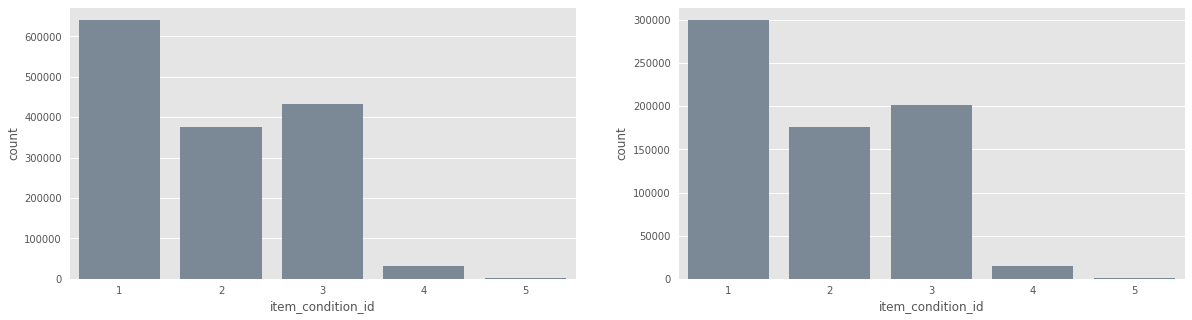

In [38]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(train.item_condition_id, color='#778899')
plt.subplot(122)
sns.countplot(test.item_condition_id, color='#778899')
plt.show()

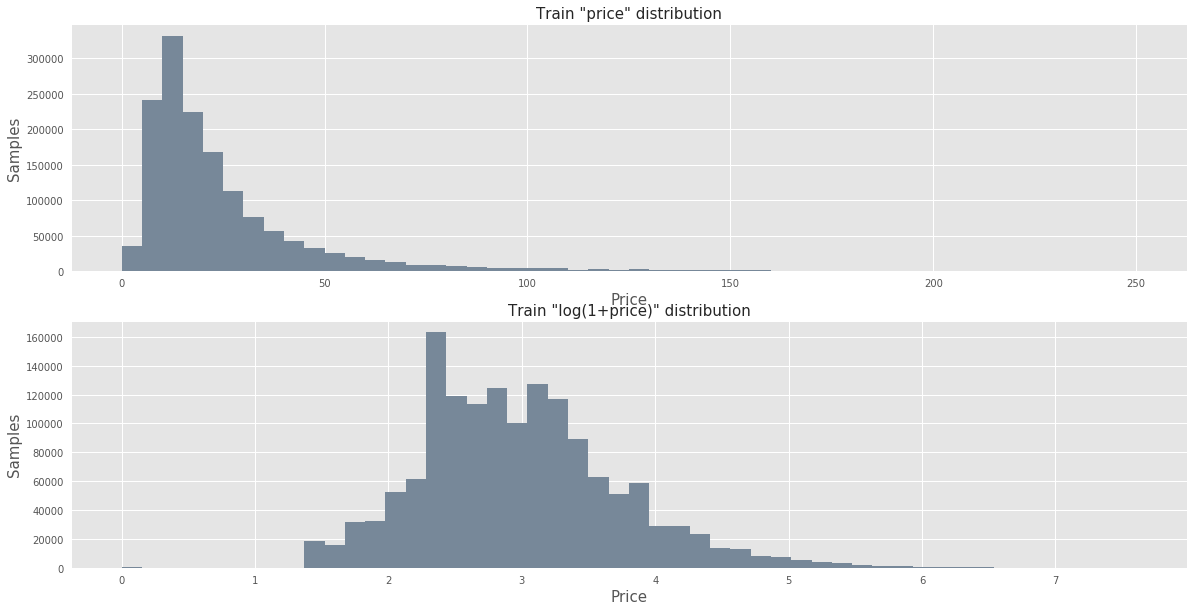

In [53]:
plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.hist(train['price'], bins=50, range=[0,250], label='price', color='#778899')
plt.title('Train "price" distribution', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Samples', fontsize=15)

plt.subplot(212)
plt.hist(np.log1p(train['price']), bins=50, label='price', color='#778899')
plt.title('Train "log(1+price)" distribution', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Samples', fontsize=15)

plt.show()

In [43]:
print len(set(train.brand_name)), len(set(test.brand_name))
print len(set(train.brand_name).intersection(set(test.brand_name)))

4810 3901
3421


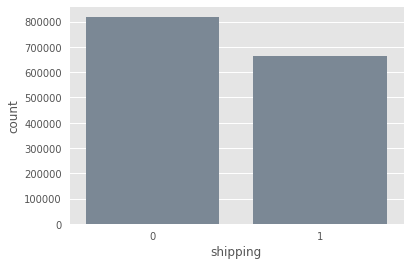

In [45]:
sns.countplot(train.shipping, color='#778899')
plt.show()

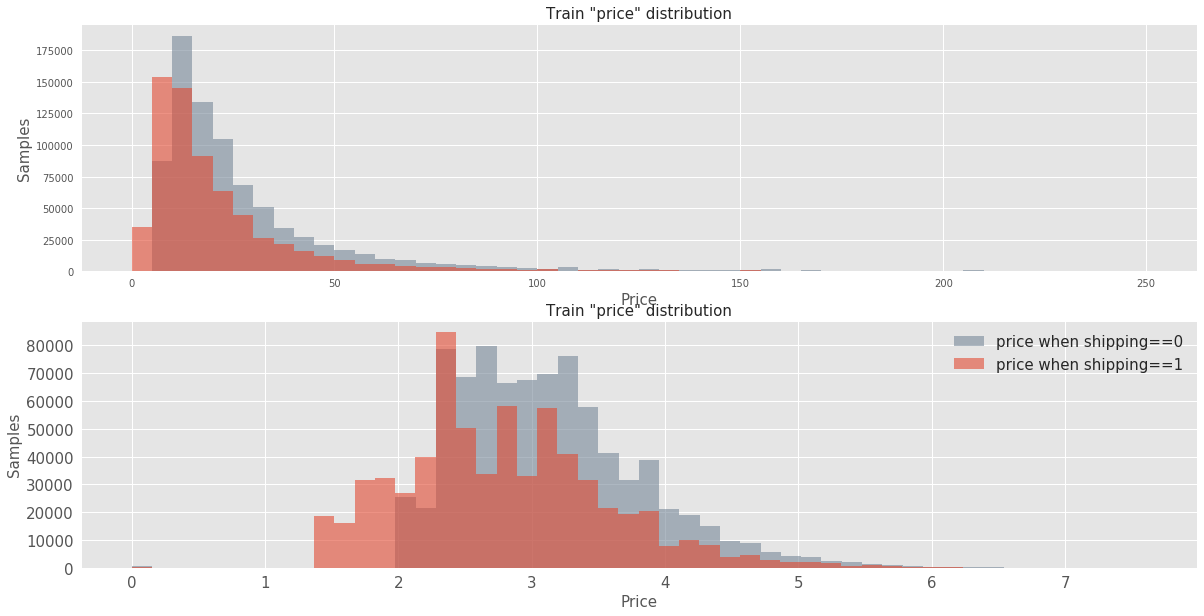

In [65]:
plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.hist(train[train.shipping == 0]['price'], bins=50, range=[0,250], 
         alpha=0.6, label='price when shipping==0', color='#778899')
plt.title('Train "price" distribution', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Samples', fontsize=15)

plt.hist(train[train.shipping == 1]['price'], bins=50, range=[0,250],
         alpha=0.6, label='price when shipping==1', color=color[0])
plt.title('Train "price" distribution', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Samples', fontsize=15)

plt.subplot(212)
plt.hist(np.log1p(train[train.shipping == 0]['price']), bins=50, 
         alpha=0.6, label='price when shipping==0', color='#778899')
plt.title('Train "price" distribution', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Samples', fontsize=15)

plt.hist(np.log1p(train[train.shipping == 1]['price']), bins=50,
         alpha=0.6, label='price when shipping==1', color=color[0])
plt.title('Train "price" distribution', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Samples', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

In [59]:
print train[train.item_condition_id == 1].shape
print train[train.item_condition_id == 2].shape
print train[train.item_condition_id == 3].shape
print train[train.item_condition_id == 4].shape
print train[train.item_condition_id == 5].shape

(640549, 8)
(375479, 8)
(432161, 8)
(31962, 8)
(2384, 8)


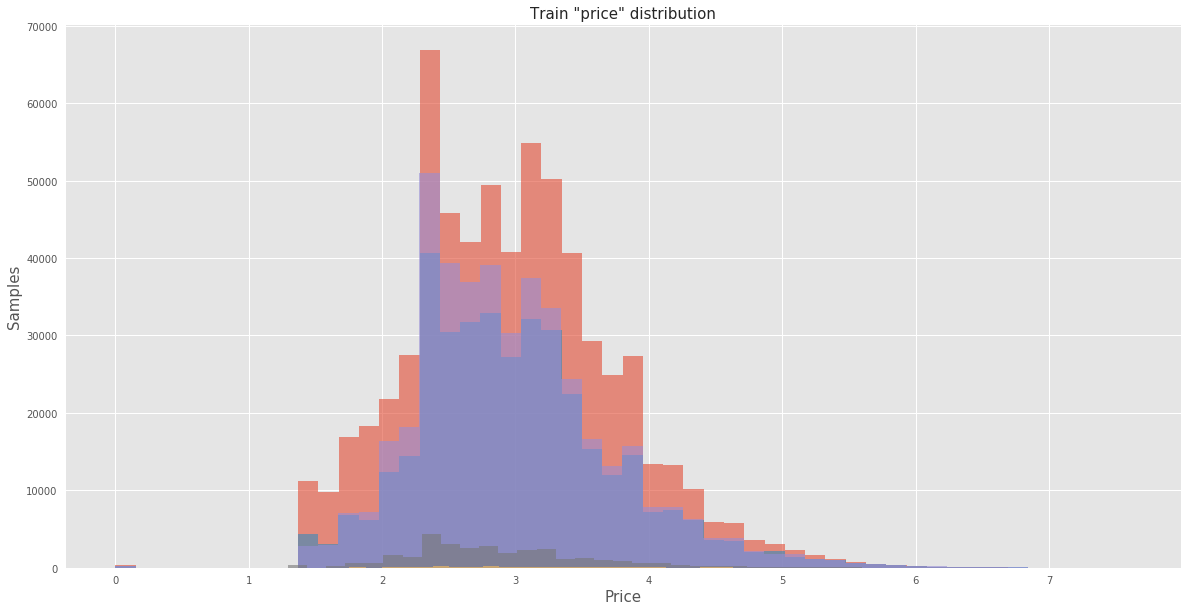

In [64]:
plt.figure(figsize=(20, 10))

plt.hist(np.log1p(train[train.item_condition_id == 1]['price']), bins=50,
         alpha=0.6, label='price when item_condition_id==1', color=color[0])
plt.title('Train "price" distribution', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Samples', fontsize=15)

plt.hist(np.log1p(train[train.item_condition_id == 2]['price']), bins=50,
         alpha=0.6, label='price when item_condition_id==2', color=color[1])
plt.title('Train "price" distribution', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Samples', fontsize=15)

plt.hist(np.log1p(train[train.item_condition_id == 3]['price']), bins=50, 
         alpha=0.6, label='price when item_condition_id==3', color=color[2])
plt.title('Train "price" distribution', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Samples', fontsize=15)

plt.hist(np.log1p(train[train.item_condition_id == 4]['price']), bins=50,
         alpha=0.6, label='price when item_condition_id==4', color=color[3])
plt.title('Train "price" distribution', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Samples', fontsize=15)

plt.hist(np.log1p(train[train.item_condition_id == 5]['price']), bins=50,
         alpha=0.6, label='price when item_condition_id==5', color=color[4])
plt.title('Train "price" distribution', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Samples', fontsize=15)

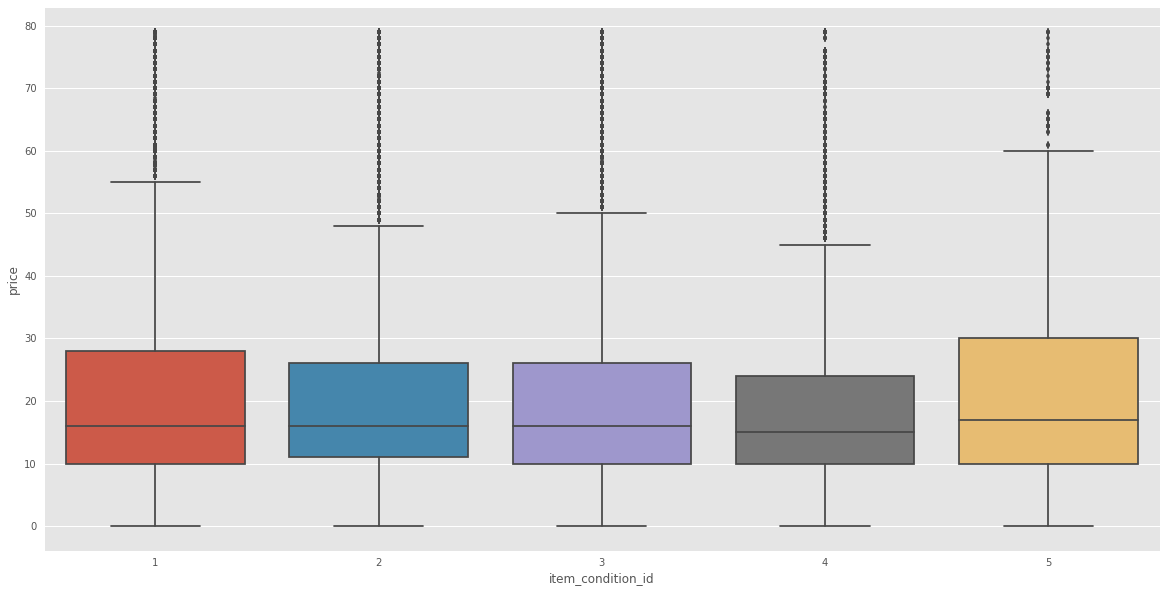

In [78]:
plt.figure(figsize=(20, 10))
df = train[train['price'] < 80]
sns.boxplot(x='item_condition_id', y='price', data=df)

# Text exploration

In [81]:
from wordcloud import WordCloud

(-0.5, 1439.5, 1079.5, -0.5)

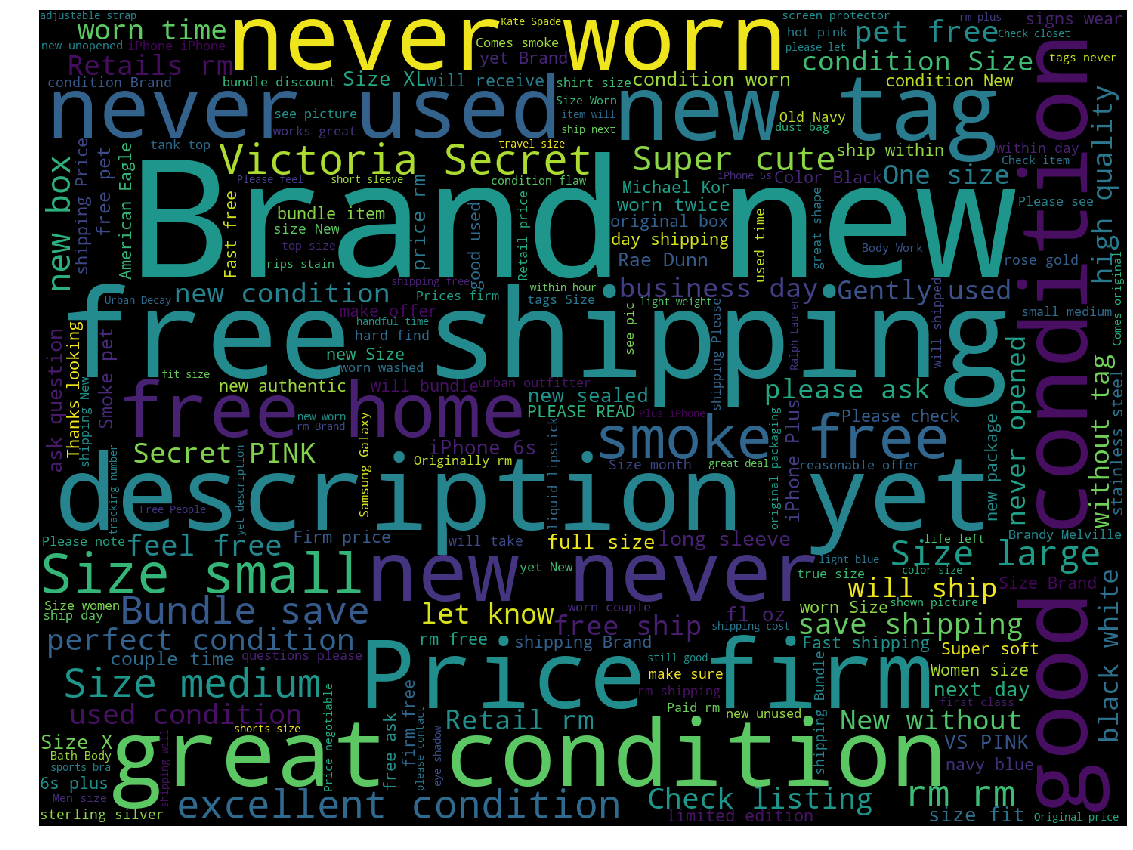

In [82]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train['item_description'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')